In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data

In [2]:
file_name='https://raw.githubusercontent.com/prasangalk/MachineLearning/main/medical%20insurance/Train_Data.csv'
# Load CSV File
data = pd.read_csv(file_name)

# Exploratory data analysis

In [3]:
data.shape

(3630, 7)

In [4]:
data.sample(5)

,age,sex,bmi,smoker,region,children,charges
2450,43.109376,male,28.326249,no,southwest,2,7688.314545
332,40.000000,female,27.400000,no,southwest,1,6496.886000
3082,28.128215,male,37.796163,no,northeast,5,6009.982378
1957,30.950780,male,32.915873,no,southwest,5,6379.708830
1347,45.000000,female,26.600345,no,northeast,2,8588.388455


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3630.0,38.887036,12.151029,18.0000,29.000000,39.170922,48.343281,64.00000
bmi,3630.0,30.629652,5.441307,15.9600,26.694526,30.200000,34.100000,53.13000
children,3630.0,2.503581,1.712568,0.0000,1.000000,3.000000,4.000000,5.00000
charges,3630.0,12784.808644,10746.166743,1121.8739,5654.818262,9443.807222,14680.407505,63770.42801


In [7]:
data.isna().any()

age         False
sex         False
bmi         False
smoker      False
region      False
children    False
charges     False
dtype: bool

# Feature Engineering

Catogorical Variables to Numerical conversion

In [ ]:
data['is_smoker'] = np.where((data['smoker'] == 'yes') , 1,0)
data['is_male'] = np.where((data['sex'] == 'male') , 1,0)

one hot encoding

In [ ]:
data =data.join(pd.get_dummies(data['region'], prefix='reg'))
data.head()

,age,sex,bmi,smoker,region,children,charges,is_smoker,is_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest
0,21.000000,male,25.745000,no,northeast,2,3279.868550,0,1,1,0,0,0
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,1,0,0,0,1,0
2,18.000000,male,30.030000,no,southeast,1,1720.353700,0,1,0,0,1,0
3,37.000000,male,30.676891,no,northeast,3,6801.437542,0,1,1,0,0,0
4,58.000000,male,32.010000,no,southeast,1,11946.625900,0,1,0,0,1,0


checking for outliers

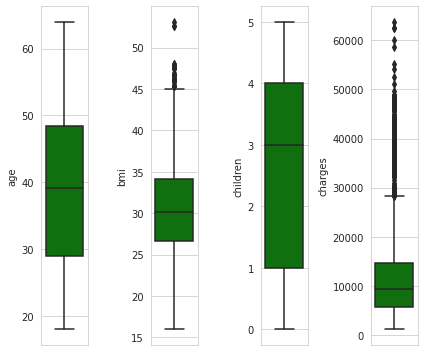

In [ ]:
l = data.columns.values
index=[0,2,5,6]  #index for outlier test
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
for i in range(0,4):
    plt.subplot(1 ,4,i+1)
    sns.boxplot(y=data[l[index[i]]],color='green',orient='v')
    plt.tight_layout()

removing outliers in bmi

In [ ]:
Q25=data['bmi'].quantile(.25)
Q75=data['bmi'].quantile(.75)
diff=Q75-Q25
lower_line=Q25-1.5*(diff)
upper_line=Q75+1.3*(diff)
data1 = data.loc[(data["bmi"] < upper_line) & (data["bmi"] > lower_line)] #new data set with outliers filtered


removing outliers in charges

In [ ]:
Q25=data1['charges'].quantile(.24)
Q75=data1['charges'].quantile(.64)
diff=Q75-Q25
lower_line=Q25-1.5*(diff)
upper_line=Q75+1.5*(diff)
data2 = data1.loc[(data1["charges"] < upper_line) & (data1["charges"] > lower_line)] #new data set with outliers filtered 


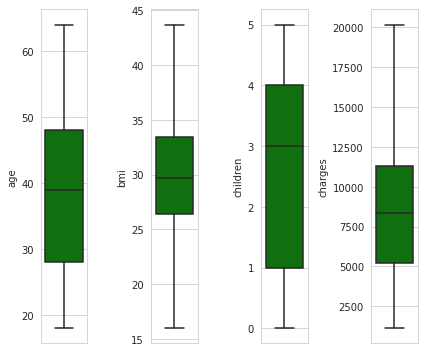

In [ ]:
index=[0,2,5,6]  #index for outlier test
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
for i in range(0,4):
    plt.subplot(1 ,4,i+1)
    sns.boxplot(y=data2[l[index[i]]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
data2.shape

(3006, 13)

re-arranging the data

In [ ]:
dataset=data2[['age','bmi','children','is_smoker','is_male','reg_northeast','reg_northwest','reg_southeast','reg_southwest','charges']]
dataset.head()

,age,bmi,children,is_smoker,is_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,charges
0,21.0,25.745000,2,0,1,1,0,0,0,3279.868550
2,18.0,30.030000,1,0,1,0,0,1,0,1720.353700
3,37.0,30.676891,3,0,1,1,0,0,0,6801.437542
4,58.0,32.010000,1,0,1,0,0,1,0,11946.625900
5,46.0,26.620000,1,0,1,0,0,1,0,7742.109800


# Correlation plots

In [ ]:
correlation_matrix = dataset[['age','bmi','children','charges','is_smoker','is_male','reg_northeast','reg_northwest','reg_southeast','reg_southwest']].corr()
print(correlation_matrix['charges'].sort_values())

reg_southwest   -0.163218
is_male         -0.067385
bmi             -0.011718
reg_southeast    0.011019
reg_northwest    0.019978
reg_northeast    0.139680
children         0.163299
is_smoker        0.432600
age              0.520700
charges          1.000000
Name: charges, dtype: float64


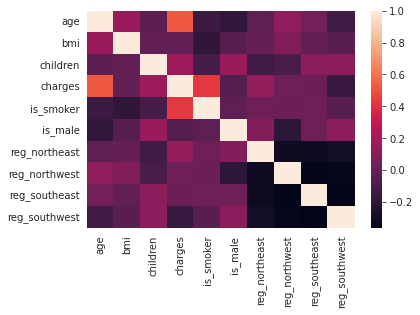

In [ ]:
import seaborn as sns
sns.heatmap(correlation_matrix)

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.drop(columns= ['charges','reg_southeast'])  # southeast dropped due to the low correlation
y = dataset['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Model Training Function**

In [ ]:
from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    m1=model.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    #y_pred_prob = model.predict_proba(X_test)[:, 1]
    #test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    r2 =r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    #------------------data visualizing------------
    plt.scatter(y_test, y_pred, color = "black")
    plt.title (model_name)
    plt.xlabel("Y measured")
    plt.ylabel("Y predicted")
    m, b = np.polyfit(y_test, y_pred, 1)
    #plt.show()
    plt.plot(y_test, m*y_test+b) #+b
    #----------------------------------------------

    return ({'model_name'    :model_name, 
                   'model'   :model, 
                   'r2_score':r2, 
                   'MSE'     :MSE,
                  'RMSE'     :RMSE})

Results display function

In [ ]:
def display_results(model_obj):
    results = pd.DataFrame([[model_obj['model_name'], 
                        model_obj['r2_score'],
                        model_obj['MSE'],
                        model_obj['RMSE']]],
                        
                        columns = ['Model', 'r2_score', 'MSE', 'RMSE']
    )

    return results

In [ ]:
# regression algorithms
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Training the models

Linear regression

{'MSE': 7124544.379372094,
 'RMSE': 2669.184216080279,
 'model': LinearRegression(),
 'model_name': 'Linear Regression',
 'r2_score': 0.6275613721806004}

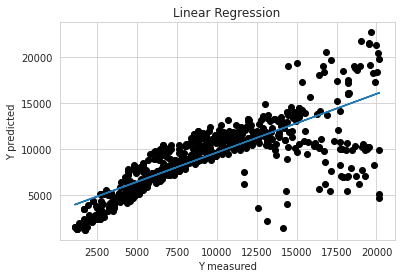

In [ ]:
model_LR = model_train(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)
model_LR

In [ ]:
results = display_results(model_LR)
results

,Model,r2_score,MSE,RMSE
0,Linear Regression,0.627561,7.124544e+06,2669.184216


XGBoost Regressor

,Model,r2_score,MSE,RMSE
0,Linear Regression,0.627561,7.124544e+06,2669.184216
1,XGB Regresser,0.794439,3.932259e+06,1982.992544


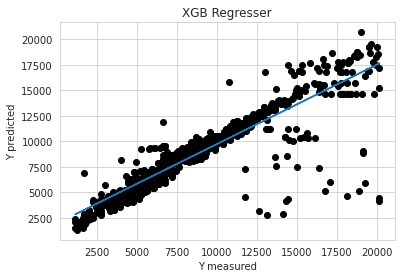

In [ ]:
model_XGB = model_train(XGBRegressor(verbosity=0), 'XGB Regresser', X_train, y_train, X_test, y_test)
results2 = results.append(display_results(model_XGB), ignore_index=True)
results2


RandomForestRegressor

,Model,r2_score,MSE,RMSE
0,Linear Regression,0.627561,7.124544e+06,2669.184216
1,XGB Regresser,0.794439,3.932259e+06,1982.992544
2,RandFor. Regresser,0.880586,2.284328e+06,1511.399224


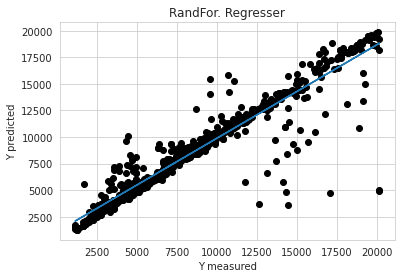

In [ ]:
model_RFR = model_train(RandomForestRegressor(n_estimators = 100, random_state = 0), 'RandFor. Regresser', X_train, y_train, X_test, y_test)
results3 = results2.append(display_results(model_RFR), ignore_index=True)
results3


decision tree regressor

,Model,r2_score,MSE,RMSE
0,Linear Regression,0.627561,7.124544e+06,2669.184216
1,XGB Regresser,0.794439,3.932259e+06,1982.992544
2,RandFor. Regresser,0.880586,2.284328e+06,1511.399224
3,Dec_Tree Regresser,0.820723,3.429477e+06,1851.884717


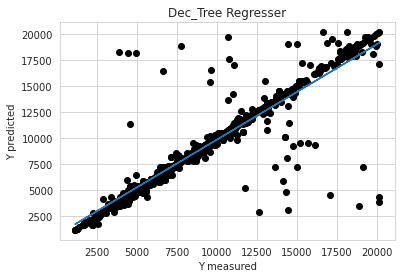

In [ ]:
model_DTR = model_train(DecisionTreeRegressor(), 'Dec_Tree Regresser', X_train, y_train, X_test, y_test)
results4 = results3.append(display_results(model_DTR), ignore_index=True)
results4

# Selecting the Best Model

considering r2 score, MSE and RMSE , Random Foreset Regressor is selected as the Final Model

# **Hyperparameter_Tuning for RFR**

In [ ]:
from sklearn.model_selection import GridSearchCV
    
# Define Hyperparameter Grid
param_grid = {
    #'bootstrap': [True],
    'max_depth': [10, 20, 34, 40],  #34
    'min_samples_leaf':[1,2,3],     #[int(x) for x in np.linspace(1, 301, 10)], #[3, 4, 5],  #1
    'min_samples_split':[2,3,4],    #[8, 10, 12],  #2
    'n_estimators': [80,90,100]
}

# Create a base model
rfr = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True,scoring='r2')
  
# Create RandomizedSearchCV object
#model_cv = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1')
  
#model_cv.fit(X_train[features_to_model], y_train)

# Fit the grid search to the data
grid_search.fit(X_train, y_train);
#grid_search.best_params_
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(grid_search.best_params_))
print("Best model score: {}".format(grid_search.best_score_))
#print("Best model score: {}".format(grid_search.score))
#grid_search.cv_results_
#grid_search.cv_results_['split0_test_score']

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Tuned Model Parameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best model score: 0.8469729494088006


# Grid Search CV as a Function

In [ ]:
def grid_search_fn(parameters,xtrain_data,ytrain_data,search_range,test_name):
  rfr = RandomForestRegressor(random_state = 42)
  grid_search = GridSearchCV(estimator = rfr, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True,scoring='r2')
 
  # Fit the grid search to the data
  grid_search.fit(xtrain_data, ytrain_data);
  print("Tuned Model Parameters: {}".format(grid_search.best_params_))
  print("Best model score: {}".format(grid_search.best_score_))
  #print("Best model score: {}".format(grid_search.score))
  #grid_search.cv_results_
  #grid_search.cv_results_['split0_test_score']
  #--------------Plotting the parameters------------------------
  X=search_range
  plt.plot(X, grid_search.cv_results_['split1_test_score'], color = "blue")
  plt.title ('r2 score Vs ' + test_name)
  plt.xlabel(test_name)
  plt.ylabel("r2 score")
  plt.show()


testing the function

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Model Parameters: {'bootstrap': True, 'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model score: 0.8444588145426201


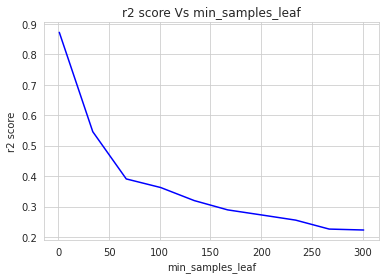

In [ ]:
test_range=[int(x) for x in np.linspace(1, 301, 10)]
param_grid = {
    'bootstrap': [True],
    'max_depth': [34], 
    'min_samples_leaf':test_range,
    'min_samples_split':[2], 
    'n_estimators': [100]
}
grid_search_fn(param_grid,X_train,y_train,test_range,'min_samples_leaf')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Model Parameters: {'bootstrap': True, 'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model score: 0.8444588145426201


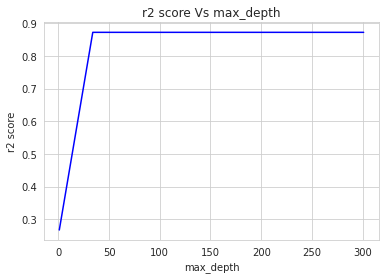

In [ ]:
test_range=[int(x) for x in np.linspace(1, 301, 10)]
param_grid = {
    'bootstrap': [True],
    'max_depth': test_range, 
    'min_samples_leaf':[1],
    'min_samples_split':[2], 
    'n_estimators': [100]
}
grid_search_fn(param_grid,X_train,y_train,test_range,'max_depth')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Model Parameters: {'bootstrap': True, 'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 134}
Best model score: 0.8450905186744876


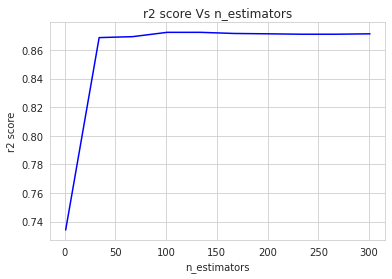

In [ ]:
test_range=[int(x) for x in np.linspace(1, 301, 10)]
param_grid = {
    'bootstrap': [True],
    'max_depth': [34], 
    'min_samples_leaf':[1],
    'min_samples_split':[2], 
    'n_estimators': test_range
}
grid_search_fn(param_grid,X_train,y_train,test_range,'n_estimators')

# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    #'bootstrap': [True],
    'max_depth': [10, 20, 34, 40],  #34
    'min_samples_leaf':[1,2,3],     #[int(x) for x in np.linspace(1, 301, 10)], #[3, 4, 5],  #1
    'min_samples_split':[2,3,4],    #[8, 10, 12],  #2
    'n_estimators': [80,90,100]
}

# Create a base model
rfr = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(rfr, param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True,scoring='r2')
  
# Create RandomizedSearchCV object
#model_cv = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1')
  
#model_cv.fit(X_train[features_to_model], y_train)

# Fit the grid search to the data
grid_search.fit(X_train, y_train);
#grid_search.best_params_
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(grid_search.best_params_))
print("Best model score: {}".format(grid_search.best_score_))
#print("Best model score: {}".format(grid_search.score))
#grid_search.cv_results_
#grid_search.cv_results_['split0_test_score']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Model Parameters: {'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 20}
Best model score: 0.8469459810459248


Testing the best parameters

,Model,r2_score,MSE,RMSE
0,Linear Regression,0.627561,7.124544e+06,2669.184216
1,XGB Regresser,0.794439,3.932259e+06,1982.992544
2,RandFor. Regresser,0.880586,2.284328e+06,1511.399224
3,Dec_Tree Regresser,0.820723,3.429477e+06,1851.884717
4,RFR_Hyper,0.880586,2.284328e+06,1511.399224


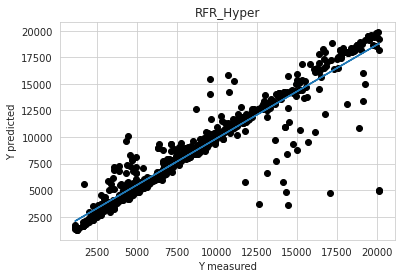

In [ ]:
model_RFR_hyper = model_train(RandomForestRegressor(bootstrap=True,
 max_depth=34,
 min_samples_leaf= 1,
 min_samples_split=2,
 n_estimators=100, random_state = 0), 'RFR_Hyper', X_train, y_train, X_test, y_test)
results5 = results4.append(display_results(model_RFR_hyper), ignore_index=True)
results5

# Saving the best Model

In [ ]:
final_model=model_RFR['model']

In [ ]:
import joblib

file_name = 'Model_RFR.joblib'
joblib.dump(final_model, open(file_name, 'wb'))

# Importing the saved Model

In [ ]:
# loading from file
file_name = 'Model_RFR.joblib'
model_imported = joblib.load(file_name)
model_imported

RandomForestRegressor(random_state=0)

# **Data Pre-Processing Function**

In [ ]:
def pre_processing(data_input):    
    
    data_input['is_smoker'] = np.where((data_input['smoker'] == 'yes') , 1,0)
    data_input['is_male'] = np.where((data_input['sex'] == 'male') , 1,0)

    #Adding One-hot encoding
    data_input[['reg_northeast','reg_northwest','reg_southeast','reg_southwest']] = 0
    #One hot encoding considering the region column
    if (data_input['region'].str.contains('northeast').any):
        data_input['reg_northeast'] = 1
    elif (data_input['region'].str.contains('northwest').any):
        data_input['reg_northwest'] = 1
    elif (data_input['region'].str.contains('southeast').any):
        data_input['reg_southeast'] = 1
    elif (data_input['region'].str.contains('southwest').any):
        data_input['reg_southwest'] = 1

    data_input = data_input.drop(columns= ['reg_southeast','charges'])
    
    dataset_output = data_input[['age','bmi','children','is_smoker','is_male','reg_northeast','reg_northwest','reg_southwest']]
    return dataset_output   
    

In [ ]:
def score(input_data, model):
    return model.predict(input_data)

# Predicting Random value taken from the data set

In [ ]:
raw_dataset = data.sample(1)

test_dataset_y=raw_dataset['charges']
test_dataset=pre_processing(raw_dataset)
test_prediction = score(test_dataset, model_imported)
#-----printing-----
result=raw_dataset
result['y actual'] = test_dataset_y
result['y_predicted'] = test_prediction[0]
result

,age,sex,bmi,smoker,region,children,charges,is_smoker,is_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,y actual,y_predicted
1960,42.451275,male,24.273893,no,southeast,5,9439.235964,0,1,1,0,0,0,9439.235964,10627.272513
